# Versioning info

In [1]:
import qiskit.tools.jupyter

%qiskit_version_table

In [2]:
folder_name = "results/"

# Graphs

## Complexity bounds

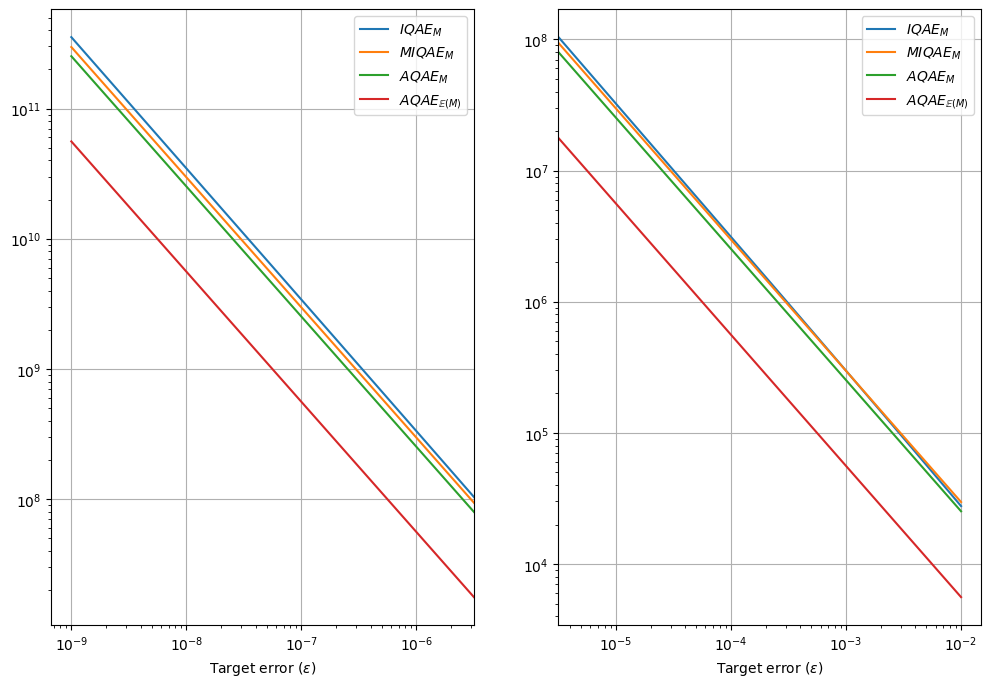

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

epsilon = []
epsilon.append(np.linspace(1e-9,10**(-5.5),50))
epsilon.append(np.linspace(10**(-5.5),1e-2,50))

alpha = 0.05

split = len(epsilon)//2

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

for k in range(2):

    #IQAE bound
    bounds = 50/epsilon[k]*np.log(2/alpha*np.emath.logn(2,np.pi/(4*epsilon[k])))
    axs[k].plot(epsilon[k], bounds, label = "$IQAE_M$")
    
    #MIQAE bound
    bounds = 62/epsilon[k]*math.log(6/alpha)
    axs[k].plot(epsilon[k], bounds, label = "$MIQAE_M$")
    
    #AQAE_standard bound
    bounds = (85.637-55.674*math.log(alpha))/epsilon[k]
    axs[k].plot(epsilon[k], bounds, label = "$AQAE_M$")
    
    #AQAE_accelerated bound
    bounds = (25.380-10.201*math.log(alpha))/epsilon[k]
    axs[k].plot(epsilon[k], bounds, label = "$AQAE_{\\mathbb{E}(M)}$")
    
    axs[k].set_yscale('log')
    axs[k].set_xlabel("Target error ($\\epsilon$)")
    axs[k].set_xscale('log')
    axs[k].xaxis.grid(True)
    axs[k].yaxis.grid(True)
    axs[k].legend()

axs[0].set_xlim(right=10**(-5.5))
axs[1].set_xlim(left=10**(-5.5))

import tikzplotlib
tikzplotlib.save(folder_name+"complexity_bounds.tex")
    
plt.savefig(folder_name+"complexity_bounds.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Numerical results

In [4]:
import statistics as st
import os.path
import pandas as pd

def run_estimation_round (p, epsilon_target = 0.001, alpha = 0.05, number_of_reps = 1, folder_name = "", methods = {}, submethods = {}):
    
    data = {}

    for method in methods:
        data[method] = {}
        for confint in submethods[method]:
            filename = folder_name + method + "_"+confint+"_p="+str(p)+"_eps="+str(epsilon_target)+"_alpha="+str(alpha)+".csv"
            df = pd.DataFrame()

            if os.path.exists (filename):
                df = pd.read_csv(filename,index_col=0)
            else:
                print (f"Error: {filename} doesn't exist.")
                return None
                
            if number_of_reps <= len(df.index):
                df = df.head(number_of_reps)
            else:
                print (f"Error: {filename} doesn't contain sufficient number of results.")
                return None
                
            data[method][confint] = df.describe()
   
    return data

In [5]:
methods = ["AQAE_accelerated", "IQAE", "MIQAE"]

submethods = {}
submethods["IQAE"] = ["chernoff","beta"]
submethods["MIQAE"] = ["chernoff","beta"]
submethods["AQAE_accelerated"] = ["hoeffding", "clopper_pearson","score"]

method_labels = ["AQAE", "IQAE", "MIQAE"]
submethod_labels = {}
submethod_labels["IQAE"] = ["H","CP"]
submethod_labels["MIQAE"] = ["H","CP"]
submethod_labels["AQAE_accelerated"] = ["H", "CP","W"]

In [6]:
p = 0.5
alpha = 0.05
number_of_reps = 2000

epsilon = np.array([0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001])
data = []

for epsilon_target in epsilon:
    new_data = run_estimation_round (p, epsilon_target=epsilon_target, alpha=alpha, number_of_reps = number_of_reps, folder_name=folder_name, methods=methods, submethods=submethods)
    data.append(new_data)

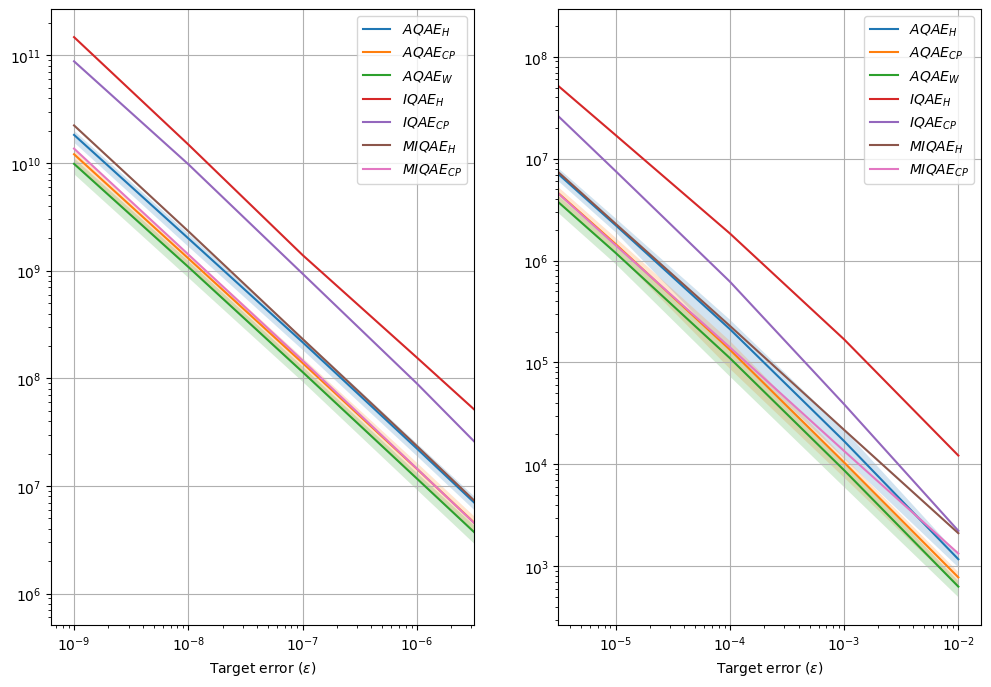

In [7]:
import math

split = len(epsilon)//2

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

#fig.suptitle('Average performance for p = ' + str(p) + ' (' + str(number_of_reps) + ' repetitions)', fontsize=12)

for method, method_label in zip(methods, method_labels):
    for submethod, submethod_label in zip(submethods[method], submethod_labels[method]):
        results = {}
        for info in {"mean", "25%", "75%"}:
            results[info] = [max(data[e][method][submethod]["shots"][info],0.01) for e in range(len(epsilon))]
        axs[0].plot(epsilon[split-1:], results["mean"][split-1:], label = f"${method_label}_{{ {submethod_label} }}$")
        axs[1].plot(epsilon[:split+1], results["mean"][:split+1], label = f"${method_label}_{{ {submethod_label} }}$")
        if method == "AQAE_accelerated":
            axs[0].fill_between(epsilon[split-1:], results["25%"][split-1:], results["75%"][split-1:], alpha=0.2)
            axs[1].fill_between(epsilon[:split+1], results["25%"][:split+1], results["75%"][:split+1], alpha=0.2)
  
for k in [0, 1]:
    axs[k].set_yscale('log')
    axs[k].set_xlabel("Target error ($\\epsilon$)")
    axs[k].set_xscale('log')
    axs[k].xaxis.grid(True)
    axs[k].yaxis.grid(True)
    axs[k].legend()

axs[0].set_xlim(right=10**(-5.5))
axs[1].set_xlim(left=10**(-5.5))

tikzplotlib.save(folder_name+"numerical_results.tex")

plt.savefig(folder_name+"numerical_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

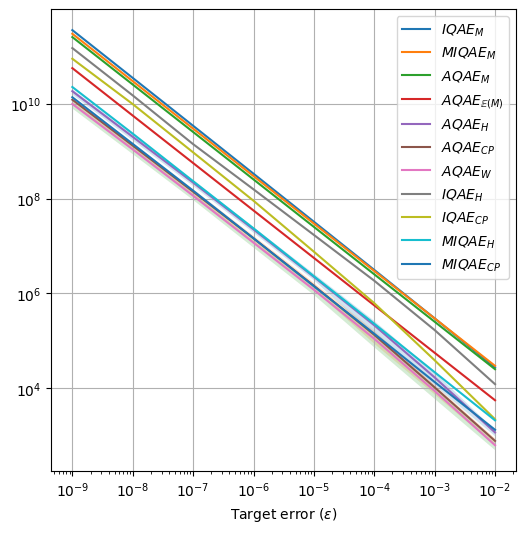

In [8]:
import math

fig, axs = plt.subplots(figsize=(6, 6))

#fig.suptitle('Average performance for p = ' + str(p) + ' (' + str(number_of_reps) + ' repetitions)', fontsize=12)

#IQAE bound
bounds = 50/epsilon*np.log(2/alpha*np.emath.logn(2,np.pi/(4*epsilon)))
axs.plot(epsilon, bounds, label = "$IQAE_M$")

#MIQAE bound
bounds = 62/epsilon*math.log(6/alpha)
axs.plot(epsilon, bounds, label = "$MIQAE_M$")

#AQAE_standard bound
bounds = (85.637-55.674*math.log(alpha))/epsilon
axs.plot(epsilon, bounds, label = "$AQAE_M$")

#AQAE_accelerated bound
bounds = (25.380-10.201*math.log(alpha))/epsilon
axs.plot(epsilon, bounds, label = "$AQAE_{\\mathbb{E}(M)}$")

for method, method_label in zip(methods, method_labels):
    for submethod, submethod_label in zip(submethods[method], submethod_labels[method]):
        results = {}
        for info in {"mean", "25%", "75%"}:
            results[info] = [max(data[e][method][submethod]["shots"][info],0.01) for e in range(len(epsilon))]
        axs.plot(epsilon, results["mean"], label = f"${method_label}_{{ {submethod_label} }}$")
        if method == "AQAE_accelerated":
            axs.fill_between(epsilon, results["25%"], results["75%"], alpha=0.2)
  
axs.set_yscale('log')
axs.set_xlabel("Target error ($\\epsilon$)")
axs.set_xscale('log')
axs.xaxis.grid(True)
axs.yaxis.grid(True)
axs.legend()

#tikzplotlib.save(folder_name+"numerical_results.tex")

#plt.savefig(folder_name+"numerical_results.pdf", format="pdf", bbox_inches="tight")
plt.show()